In [1]:
import numpy as np
import pandas as pd
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
covid = pd.read_csv("../input/covid19-global-dataset/worldometer_coronavirus_daily_data.csv").fillna(0)
covid['date'] = pd.to_datetime(covid['date'])
covid.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-02-15,Afghanistan,0.0,0.0,0.0,0.0,0.0
1,2020-02-16,Afghanistan,0.0,0.0,0.0,0.0,0.0
2,2020-02-17,Afghanistan,0.0,0.0,0.0,0.0,0.0
3,2020-02-18,Afghanistan,0.0,0.0,0.0,0.0,0.0
4,2020-02-19,Afghanistan,0.0,0.0,0.0,0.0,0.0


In [3]:
df = covid.loc[covid['country'] == "Ukraine", ["date", "daily_new_cases"]].set_index("date")
print(type(df))
df = df['daily_new_cases']
print(type(df))
df.index.freq = 'D'
df

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


date
2020-02-15       0.0
2020-02-16       0.0
2020-02-17       0.0
2020-02-18       0.0
2020-02-19       0.0
               ...  
2022-01-01    5026.0
2022-01-02    1863.0
2022-01-03    1804.0
2022-01-04    1746.0
2022-01-05    4571.0
Freq: D, Name: daily_new_cases, Length: 691, dtype: float64

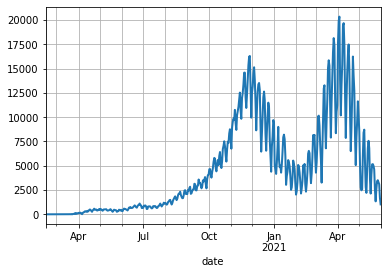

In [4]:
import matplotlib.pyplot as plt

df[:'2021-05-31'].plot(linewidth=2)
plt.grid(which='both')
plt.show()

In [5]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mae(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred))) 

def rmse(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(np.mean((y_true - y_pred)**2)) 

In [6]:
!pip3 install pytorchts

     |████████████████████████████████| 87 kB 859 kB/s 
     |████████████████████████████████| 881.9 MB 8.7 kB/s 
     |████████████████████████████████| 2.1 MB 33.3 MB/s 
     |████████████████████████████████| 10.9 MB 38.0 MB/s 
  Created wheel for pytorchts: filename=pytorchts-0.5.1-py3-none-any.whl size=112600 sha256=7829fbd3230fb2fa72df9901f96c78973f597f2d1b127f5d3cbd4468ae63167b
  Stored in directory: /root/.cache/pip/wheels/34/30/ad/ae53e2f215907242b45564077b601c00f473c0551038a3184e
Successfully built pytorchts
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
  Attempting uninstall: torch
    Found existing installation: torch 1.7.0
    Uninstalling torch-1.7.0:
      Successfully uninstalled torch-1.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is 

## GLUON

In [7]:
df[:"2021-05-31"]

date
2020-02-15       0.0
2020-02-16       0.0
2020-02-17       0.0
2020-02-18       0.0
2020-02-19       0.0
               ...  
2021-05-27    3509.0
2021-05-28    3306.0
2021-05-29    3096.0
2021-05-30    1703.0
2021-05-31    1022.0
Freq: D, Name: daily_new_cases, Length: 472, dtype: float64

In [8]:
from gluonts.dataset.common import ListDataset

training_data = ListDataset(
    [{"start": "2020-04-01", "target": df["2020-04-01":"2021-05-31"].values}],
    freq = "D"
)

/opt/conda/lib/python3.7/site-packages/gluonts/json.py:46: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [9]:
next(iter(training_data))

{'start': Timestamp('2020-04-01 00:00:00', freq='D'),
 'target': array([1.4900e+02, 1.0300e+02, 1.7500e+02, 1.5300e+02, 8.3000e+01,
        1.1000e+01, 1.4300e+02, 2.0600e+02, 2.2400e+02, 3.1100e+02,
        3.0800e+02, 2.6600e+02, 3.2500e+02, 2.7000e+02, 3.9200e+02,
        3.9700e+02, 5.0100e+02, 4.4400e+02, 3.4300e+02, 2.6100e+02,
        4.1500e+02, 4.6700e+02, 5.7800e+02, 4.7700e+02, 4.7800e+02,
        4.9200e+02, 3.9200e+02, 4.0100e+02, 4.5600e+02, 5.4000e+02,
        4.5500e+02, 5.5000e+02, 5.0200e+02, 4.1800e+02, 3.6600e+02,
        4.8700e+02, 5.0700e+02, 5.0400e+02, 5.1500e+02, 5.2200e+02,
        4.1600e+02, 3.7500e+02, 4.0200e+02, 4.2200e+02, 4.8300e+02,
        5.2800e+02, 4.3300e+02, 3.2500e+02, 2.6000e+02, 3.5400e+02,
        4.7600e+02, 4.4200e+02, 4.3200e+02, 4.0600e+02, 2.5900e+02,
        3.3900e+02, 3.2100e+02, 4.7700e+02, 4.2900e+02, 3.9300e+02,
        4.6800e+02, 3.4000e+02, 3.2800e+02, 4.8300e+02, 5.8800e+02,
        5.5300e+02, 5.5000e+02, 4.8500e+02, 4.6300e+

## Deep AR

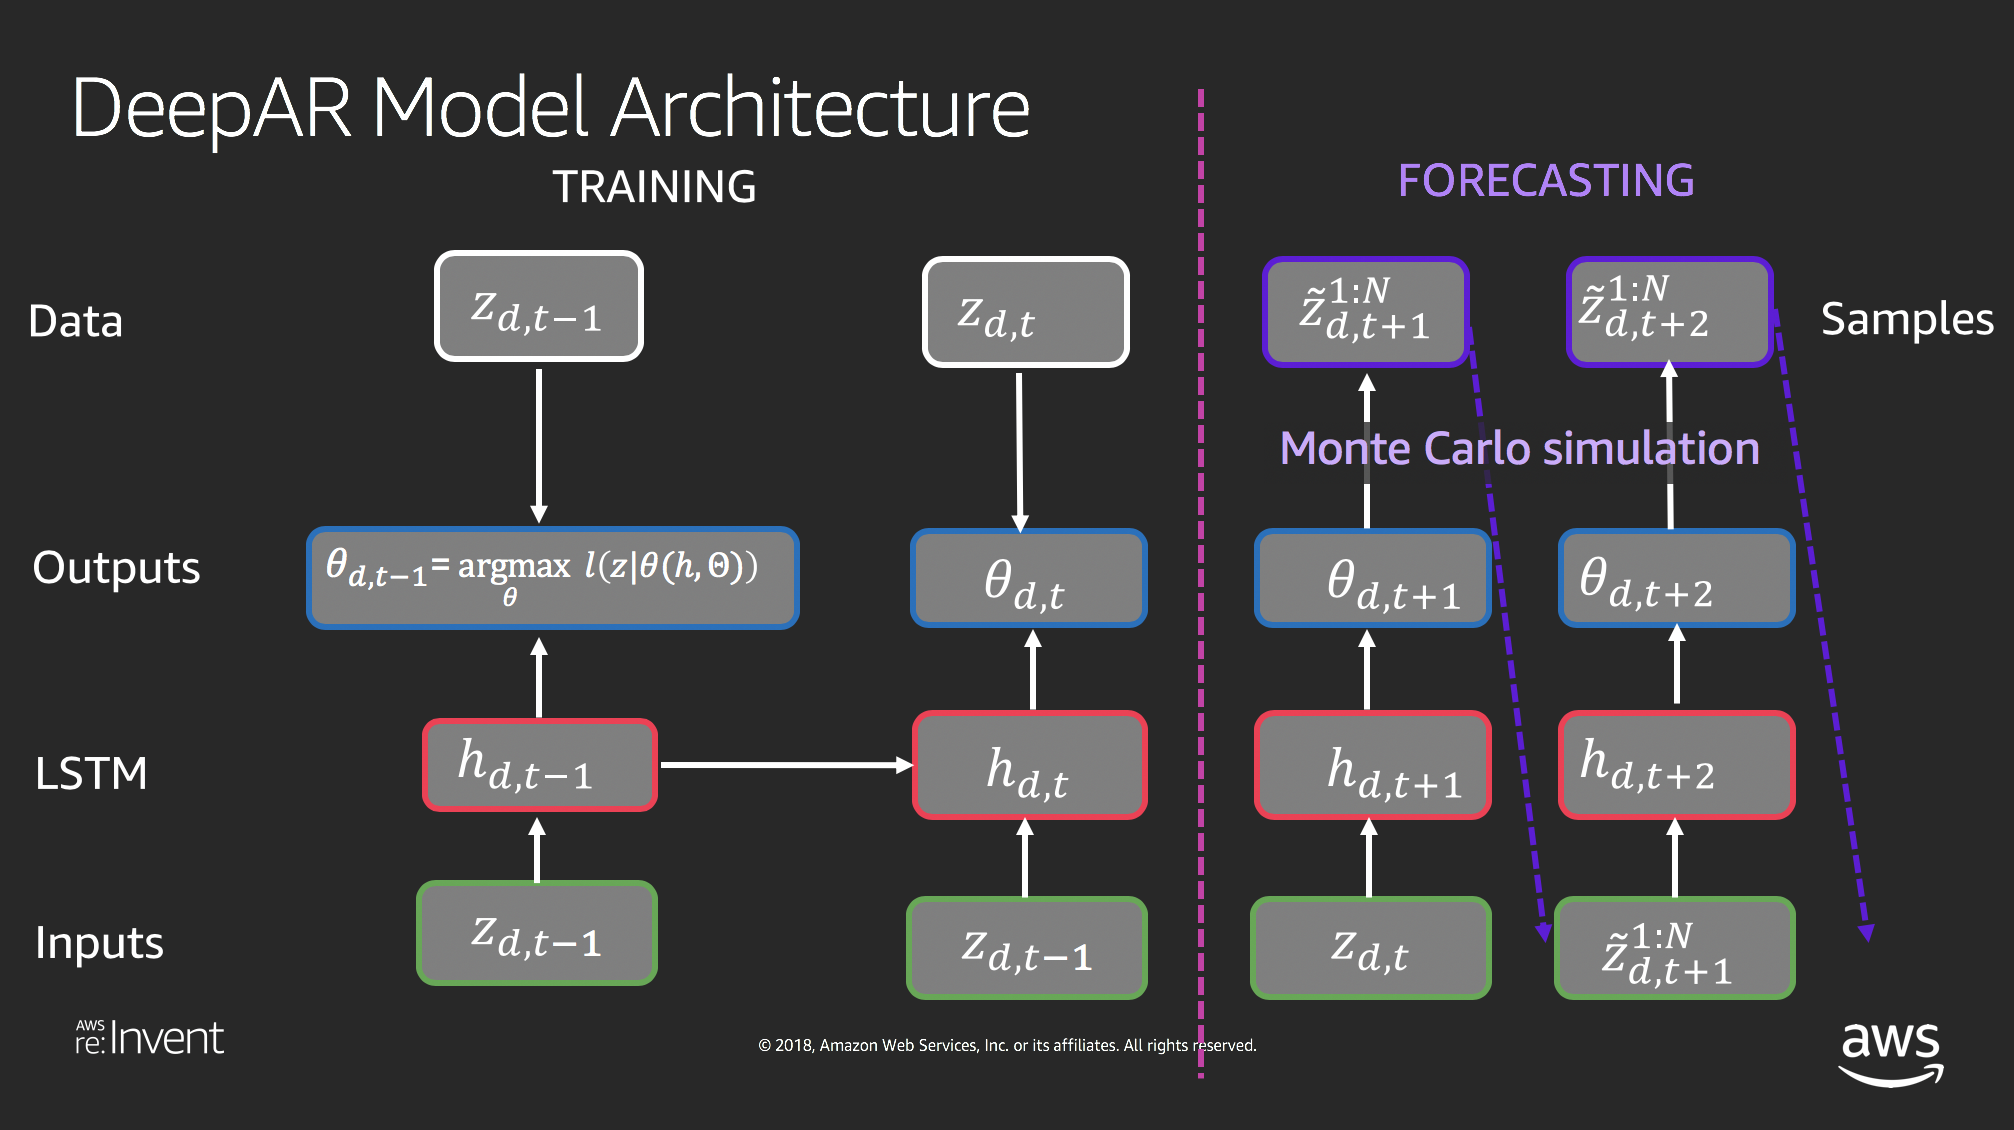

In [10]:
from pts.model.deepar import DeepAREstimator
from pts import Trainer

DeepAREstimator

pts.model.deepar.deepar_estimator.DeepAREstimator

In [11]:
?DeepAREstimator

In [12]:
estimator = DeepAREstimator(
    freq="D",context_length=100,
    prediction_length=30,
    input_size=28,
    cell_type = 'GRU',
    dropout_rate = 0.1,
    scaling = True,
    trainer=Trainer(batch_size=16, clip_gradient=True, epochs=10, learning_rate=0.001, device="cpu"))

estimator

pts.model.deepar.deepar_estimator.DeepAREstimator(cardinality=None, cell_type="GRU", context_length=100, distr_output=pts.modules.distribution_output.StudentTOutput(dim=None), dropout_rate=0.1, embedding_dimension=None, freq="D", input_size=28, lags_seq=None, num_cells=40, num_layers=2, num_parallel_samples=100, prediction_length=30, scaling=True, time_features=None, trainer=pts.trainer.Trainer(batch_size=16, clip_gradient=1.0, device="cpu", epochs=10, learning_rate=0.001, maximum_learning_rate=0.01, num_batches_per_epoch=50, weight_decay=1e-06), use_feat_dynamic_cat=False, use_feat_dynamic_real=False, use_feat_static_cat=False, use_feat_static_real=False)

In [13]:
predictor = estimator.train(training_data=training_data, num_workers=4)

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

In [14]:
#import gc
#
#del estimator
#
#gc.collect()

In [15]:
test_data = ListDataset(
    [{"start": df.index[0], "target": df[:"2021-05-31"]}],
    freq = "D"
)

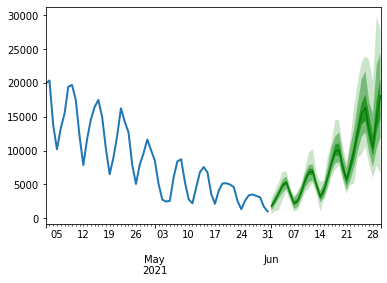

In [16]:
from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0, 99.0])
plt.show()#grid(which='both')

In [17]:
#?forecast.quantile_ts#([50.0, 90.0, 99.0])

In [18]:
forecast.samples.shape

(100, 30)

In [19]:
forecast.samples#[-1,:]

array([[ 1778.3873,  2792.7073,  3011.676 , ..., 14591.858 , 17717.658 ,
        22262.426 ],
       [ 2023.0813,  2773.039 ,  4052.9512, ..., 11304.436 , 13158.337 ,
        17706.527 ],
       [ 1384.353 ,  2644.0479,  3955.7822, ...,  8775.819 , 12750.882 ,
        15070.531 ],
       ...,
       [ 1573.8555,  2889.1494,  3229.2922, ..., 10342.042 , 13467.451 ,
        14955.339 ],
       [ 1616.8313,  2411.2263,  3975.4175, ..., 10090.129 , 16018.121 ,
        17183.627 ],
       [ 2033.206 ,  3593.8904,  3371.9978, ...,  8960.156 , 15940.351 ,
        19443.434 ]], dtype=float32)

In [20]:
forecast.samples.mean(0)

array([ 1750.1729,  2667.9563,  3711.2632,  4815.053 ,  5298.464 ,
        3650.8508,  2175.5684,  2617.8145,  3930.8127,  5612.6323,
        6777.466 ,  6884.232 ,  4869.4126,  3196.147 ,  4176.9473,
        6132.4604,  8392.659 , 10094.053 , 10234.854 ,  7536.4893,
        5699.3887,  7777.38  , 10074.088 , 13004.35  , 15527.487 ,
       16528.5   , 13261.446 , 10877.844 , 15420.485 , 17794.6   ],
      dtype=float32)

In [21]:
np.std(forecast.samples, 0)

array([ 406.77878,  479.4465 ,  549.6742 ,  644.24   ,  552.93005,
        427.39584,  464.22546,  563.76294,  567.9925 ,  683.12885,
        805.6059 ,  854.38916,  520.1046 ,  625.26807,  658.80316,
        885.92303, 1074.6123 , 1292.7474 , 1382.9901 , 1072.9381 ,
        980.4378 , 1485.0479 , 1914.5464 , 2088.895  , 2550.0906 ,
       2801.0425 , 2690.254  , 2591.8867 , 3759.188  , 3978.6067 ],
      dtype=float32)

In [22]:
mape(df["2021-06-01":"2021-06-30"], forecast.samples.mean(0)), mae(df["2021-06-01":"2021-06-30"], forecast.samples.mean(0)), rmse(df["2021-06-01":"2021-06-30"], forecast.samples.mean(0))

(1208.054187522515, 6622.0843505859375, 8216.442709902483)

In [23]:
from gluonts.evaluation import Evaluator
from gluonts.evaluation import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  # test dataset
    predictor=predictor,  # predictor
    num_samples=30,  # number of sample paths we want for evaluation
)

forecasts = list(forecast_it)
tss = list(ts_it)

evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_data))

Running evaluation: 100%|██████████| 1/1 [00:00<00:00, 17.34it/s]


In [24]:
import json

print(json.dumps(agg_metrics, indent=4))

{
    "MSE": 10614614.4,
    "abs_error": 83638.2421875,
    "abs_target_sum": 124408.0,
    "abs_target_mean": 4146.933333333333,
    "seasonal_error": 810.2018140589569,
    "MASE": 3.4410456232909974,
    "MAPE": 0.9046793619791667,
    "sMAPE": 0.5511426289876302,
    "MSIS": 74.50063031942435,
    "QuantileLoss[0.1]": 90915.41621093749,
    "Coverage[0.1]": 0.8,
    "QuantileLoss[0.5]": 83638.23706054688,
    "Coverage[0.5]": 0.9666666666666667,
    "QuantileLoss[0.9]": 23978.50234375,
    "Coverage[0.9]": 1.0,
    "RMSE": 3258.0077347974484,
    "NRMSE": 0.785642659989096,
    "ND": 0.6722899024781365,
    "wQuantileLoss[0.1]": 0.7307843242471344,
    "wQuantileLoss[0.5]": 0.6722898612673371,
    "wQuantileLoss[0.9]": 0.19274083936523373,
    "mean_absolute_QuantileLoss": 66177.38520507813,
    "mean_wQuantileLoss": 0.5319383416265684,
    "MAE_Coverage": 0.4222222222222222,
    "OWA": NaN
}


In [25]:
item_metrics.head()

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,10614614.4,83638.242188,124408.0,4146.933333,810.201814,3.441046,0.904679,0.551143,74.50063,90915.416211,0.8,83638.237061,0.966667,23978.502344,1.0


## Simple Net

In [26]:
from pts.model.simple_feedforward import SimpleFeedForwardEstimator
from pts import Trainer

estimator = SimpleFeedForwardEstimator(freq="D",
                            prediction_length=30,
                            #input_size=25,
                            context_length = 65,
                            trainer=Trainer(batch_size=32, epochs=10, earning_rate=0.001, device=device))

predictor = estimator.train(training_data=training_data, num_workers=4)

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

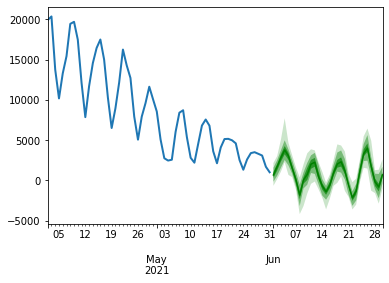

In [27]:
from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0, 99.0])
plt.show()#grid(which='both')

In [28]:
forecast.samples.mean(0)

array([  710.2875  ,  1637.4265  ,  2784.7273  ,  3801.2146  ,
        2998.904   ,  1604.9368  ,    62.99611 , -1825.1685  ,
          16.338926,   824.81647 ,  2023.3839  ,  2251.7385  ,
         621.2151  ,  -743.06396 , -1452.6205  ,  -590.3383  ,
         949.6928  ,  2134.1045  ,  2306.903   ,  1234.4272  ,
        -645.6285  , -2180.1921  , -1383.1094  ,  1158.4183  ,
        3413.8652  ,  4048.7358  ,  1675.6519  ,  -167.75574 ,
        -804.5907  ,   662.05396 ], dtype=float32)

In [29]:
preds = np.where(forecast.samples.mean(0) < 0, 0, forecast.samples.mean(0))

In [30]:
mape(df["2021-06-01":"2021-06-30"], preds), mae(df["2021-06-01":"2021-06-30"], preds), rmse(df["2021-06-01":"2021-06-30"], preds)

(102.13027422037804, 895.409726524353, 1146.4506745984957)

## Transformer

In [31]:
?TransformerEstimator

Object `TransformerEstimator` not found.


In [32]:
from pts.model.transformer import TransformerEstimator

estimator = TransformerEstimator(freq="D",
                            prediction_length=30,
                            context_length=65,
                            embedding_dimension=[20],
                            d_model = 8,
                            input_size=28,
                            dropout_rate = 0.1,
                            scaling = True,
                            trainer=Trainer(batch_size=32, clip_gradient=None, epochs=10, learning_rate=0.001, device="cpu"))

predictor = estimator.train(training_data=training_data, num_workers=4)

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

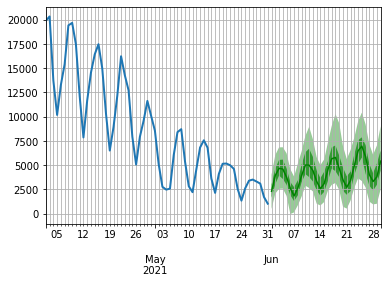

In [33]:
from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')

In [34]:
mape(df["2021-06-01":"2021-06-30"], forecast.samples.mean(0)), mae(df["2021-06-01":"2021-06-30"], forecast.samples.mean(0)), rmse(df["2021-06-01":"2021-06-30"], forecast.samples.mean(0))

(482.7332335478783, 3187.8952758789064, 3477.109454064341)

## Temporal Fusion Transformer

In [35]:
from gluonts.model.tft import TemporalFusionTransformerEstimator
from gluonts.mx.trainer import Trainer

estimator = TemporalFusionTransformerEstimator(freq="D",
                            prediction_length=30,
                            #input_size=25,
                            context_length = 65,
                            trainer=Trainer(batch_size=32,epochs=10, learning_rate=0.001))

In [36]:
predictor = estimator.train(training_data=training_data, num_workers=4)

100%|██████████| 50/50 [00:17<00:00,  2.93it/s, epoch=10/10, avg_epoch_loss=129]


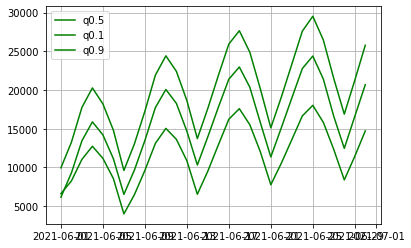

In [37]:
from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    #to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g') #, prediction_intervals=[50.0, 90.0]
plt.grid(which='both')

In [38]:
preds = np.where(forecast.mean < 0, 0, forecast.mean)

In [39]:
mape(df["2021-06-01":"2021-06-30"], preds), mae(df["2021-06-01":"2021-06-30"], preds), rmse(df["2021-06-01":"2021-06-30"], preds)

(2127.3939147229166, 14690.422151692708, 15497.500739641802)

## N-BEATS 

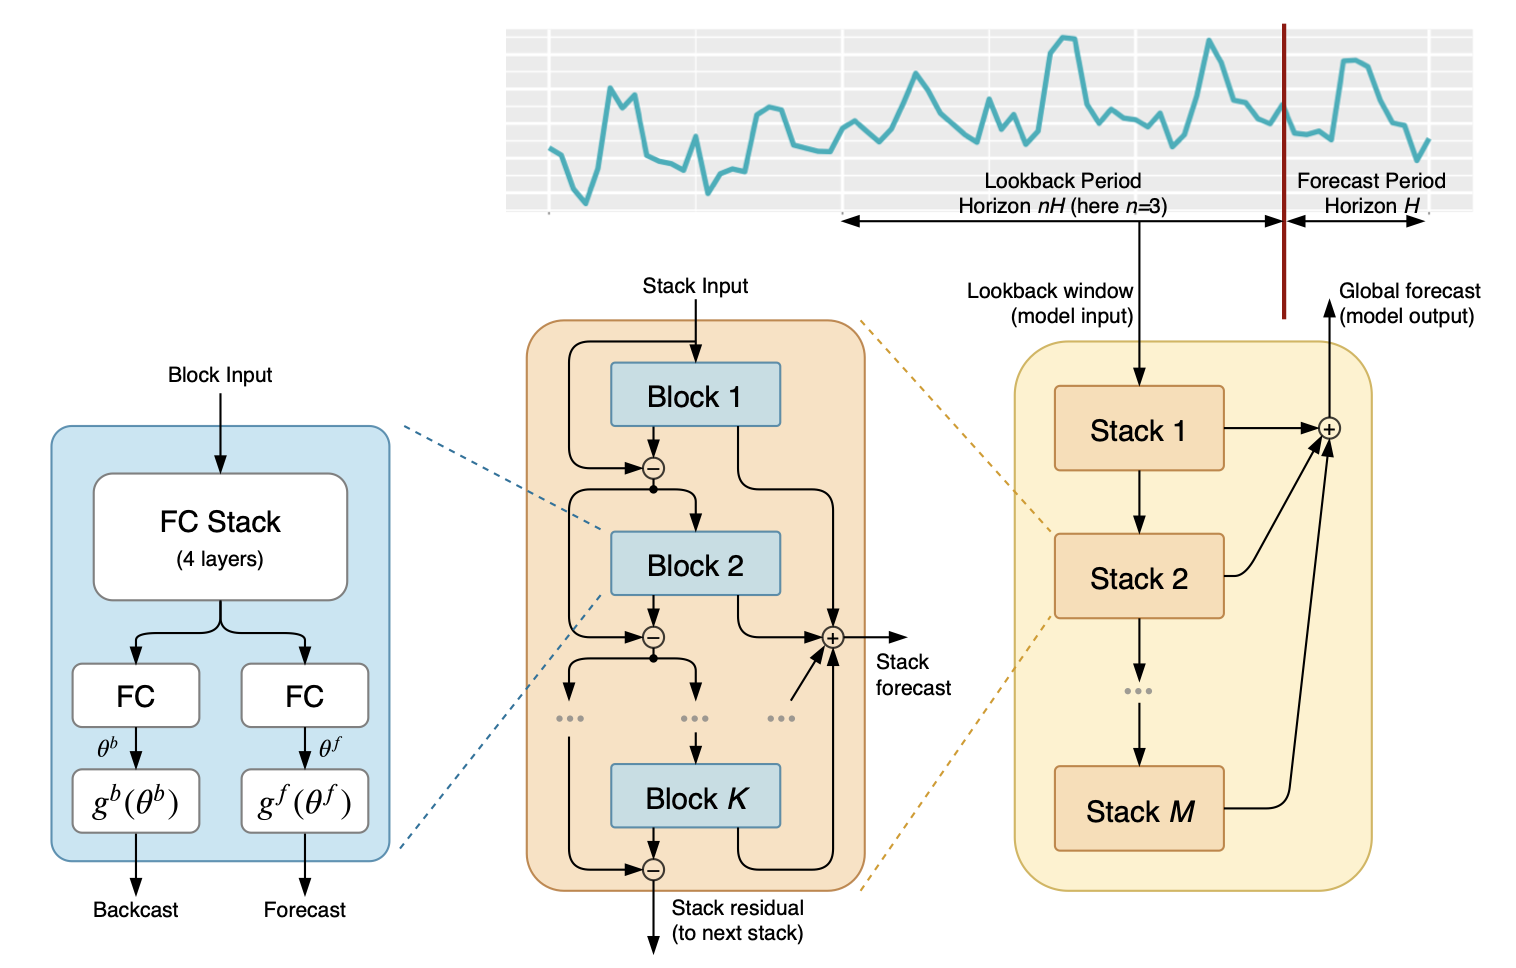

In [40]:
from gluonts.model.n_beats import NBEATSEstimator
from gluonts.mx.trainer import Trainer

estimator = NBEATSEstimator(freq="D",
                            prediction_length=30,
                            #input_size=25,
                            context_length = 65,
                            trainer=Trainer(batch_size=32,epochs=10, learning_rate=0.001))

In [41]:
predictor = estimator.train(training_data=training_data, num_workers=4)

100%|██████████| 50/50 [00:13<00:00,  3.84it/s, epoch=10/10, avg_epoch_loss=0.282]


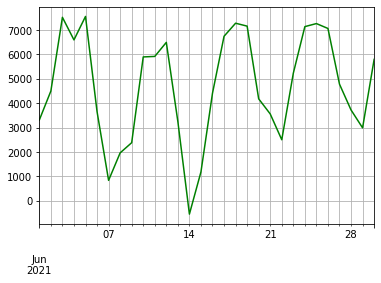

In [42]:
from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    #to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g') #, prediction_intervals=[50.0, 90.0]
plt.grid(which='both')

In [43]:
preds = np.where(forecast.mean < 0, 0, forecast.mean)

mape(df["2021-06-01":"2021-06-30"], preds), mae(df["2021-06-01":"2021-06-30"], preds), rmse(df["2021-06-01":"2021-06-30"], preds)

(485.2470530034912, 3634.816855875651, 4134.689822201549)

## Multivariate timeseries preparation

In [44]:
df = covid.loc[covid['country'].isin(["Ukraine", "Russia", "Spain", "Poland", "UK"]), ["date", "daily_new_cases", "country"]].set_index("date")
df = df.pivot(columns='country', values='daily_new_cases').fillna(0)

#df = df['daily_new_cases']
df.index.freq = 'D'
df

country,Poland,Russia,Spain,UK,Ukraine
date,,,,,
2020-02-15,0.0,0.0,0.0,0.0,0.0
2020-02-16,0.0,0.0,26.0,0.0,0.0
2020-02-17,0.0,0.0,28.0,0.0,0.0
2020-02-18,0.0,0.0,28.0,0.0,0.0
2020-02-19,0.0,0.0,18.0,0.0,0.0
...,...,...,...,...,...
2022-01-01,12033.0,19751.0,93192.0,180879.0,5026.0
2022-01-02,7180.0,18233.0,93192.0,148187.0,1863.0
2022-01-03,6419.0,16343.0,93190.0,157432.0,1804.0


In [45]:
df["2021-01-01":"2021-05-31"].values

array([[11069., 27039., 11539., 53082.,  9432.],
       [ 6988., 26301., 13643., 57506.,  5038.],
       [ 5692., 24150., 13946., 54783.,  4576.],
       [ 4404., 23351., 22561., 58560.,  4158.],
       [ 7693., 24246., 27293., 60684.,  5334.],
       [14216., 24217., 17944., 62086.,  6911.],
       [12027., 23541., 25294., 52420.,  8997.],
       [ 8986., 23652., 30718., 67794.,  5676.],
       [10271., 23309., 24259., 59710.,  4846.],
       [ 9651., 22851., 21107., 54733.,  5011.],
       [ 4447., 23315., 31635., 45993.,  4288.],
       [ 5642., 22934., 33167., 45358.,  5116.],
       [ 9074., 22850., 32755., 47344.,  6409.],
       [ 9599., 24763., 30804., 48496.,  7925.],
       [ 7675., 24715., 34378., 55546.,  8199.],
       [ 7327., 24092., 24894., 41187.,  7729.],
       [ 6116., 23586., 20348., 38450.,  5990.],
       [ 3326., 22857., 29612., 37391.,  3034.],
       [ 4859., 21734., 31688., 33230.,  3939.],
       [ 6775., 21152., 28602., 38757.,  4383.],
       [ 7205., 2188

In [46]:
df["2021-01-01":"2021-12-30"].values, df["2021-01-01":"2021-12-30"].values.T

(array([[ 11069.,  27039.,  11539.,  53082.,   9432.],
        [  6988.,  26301.,  13643.,  57506.,   5038.],
        [  5692.,  24150.,  13946.,  54783.,   4576.],
        ...,
        [  9839.,  21922.,  99671., 167939.,   2248.],
        [ 15572.,  21119., 100760., 182671.,   5454.],
        [ 14319.,  21073., 161688., 188330.,   5930.]]),
 array([[ 11069.,   6988.,   5692., ...,   9839.,  15572.,  14319.],
        [ 27039.,  26301.,  24150., ...,  21922.,  21119.,  21073.],
        [ 11539.,  13643.,  13946., ...,  99671., 100760., 161688.],
        [ 53082.,  57506.,  54783., ..., 167939., 182671., 188330.],
        [  9432.,   5038.,   4576., ...,   2248.,   5454.,   5930.]]))

In [47]:
from gluonts.dataset.common import ListDataset

training_data = ListDataset(
    [{"start": "2021-01-01", "target": df["2021-01-01":"2021-11-30"].values.T}],
    one_dim_target = False,
    freq = "D"
)

In [48]:
next(iter(training_data))

{'start': Timestamp('2021-01-01 00:00:00', freq='D'),
 'target': array([[11069.,  6988.,  5692., ..., 20594., 13141., 19086.],
        [27039., 26301., 24150., ..., 33548., 33860., 32648.],
        [11539., 13643., 13946., ...,  7637.,  7637., 10261.],
        [53082., 57506., 54783., ..., 37155., 41908., 39040.],
        [ 9432.,  5038.,  4576., ...,  7483.,  5804., 10554.]],
       dtype=float32),
 'source': SourceContext(source='list_data', row=0)}

## LSTNet

In [49]:
from gluonts.model.lstnet import LSTNetEstimator
from gluonts.mx.trainer import Trainer

estimator = LSTNetEstimator(freq="D",
                            prediction_length=30,
                            #input_size=25,
                            context_length = 105,
                            num_series = 5,
                            skip_size = 2,
                            ar_window = 5,
                            channels = 2,
                            scaling=True,
                            trainer=Trainer(batch_size=32,epochs=20, learning_rate=0.001))

In [50]:
predictor = estimator.train(training_data=training_data, num_workers=4)

100%|██████████| 50/50 [00:23<00:00,  2.15it/s, epoch=20/20, avg_epoch_loss=2.46e+3]


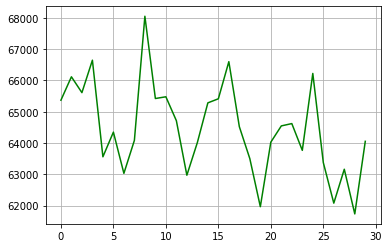

In [51]:
from gluonts.dataset.util import to_pandas

import matplotlib.pyplot as plt

for test_entry, forecast in zip(training_data, predictor.predict(training_data)):
    #pd.Series(test_entry['target'][1,:])[-60:].plot(linewidth=2)
    pd.Series(forecast.samples[:, :, 4].mean(0)).plot(color='g')
plt.grid(which='both')

In [52]:
forecast.samples[0].mean(0)

array([50981.77  , 44790.227 ,  2680.0115, 46815.152 , 64477.73  ],
      dtype=float32)

In [53]:
preds = forecast.mean[:, 4]

In [54]:
preds = np.where(preds<0, 0, preds )

In [55]:
real = df["2021-12-01":"2021-12-30"]['Ukraine']

In [56]:
mape(real, preds), mae(real, preds), rmse(real, preds)

(1044.5091316760643, 57069.761328125, 57124.92038836237)

## DeepVAR

In [57]:
import torch
from pts.model.deepvar import DeepVAREstimator
from pts import Trainer

estimator = DeepVAREstimator(freq="D",
                            prediction_length=30,
                            input_size=25,
                            target_dim=5,
                            context_length= 105,
                            #pick_incomplete=True,
                            #cell_type = 'LSTM',
                            dropout_rate = 0.1,
                            scaling = True,
                            trainer=Trainer(batch_size=1, clip_gradient=None, epochs=10, learning_rate=0.001, device="cpu"))

#predictor = estimator.train(training_data=training_data, num_workers=4)

In [58]:
predictor = estimator.train(training_data=training_data, num_workers=4)

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

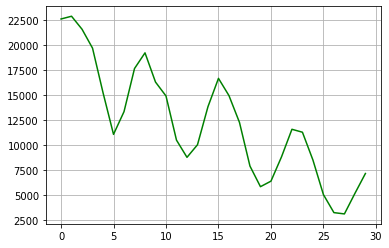

In [59]:
from gluonts.dataset.util import to_pandas

import matplotlib.pyplot as plt

for test_entry, forecast in zip(training_data, predictor.predict(training_data)):
    #pd.Series(test_entry['target'][1,:])[-60:].plot(linewidth=2)
    pd.Series(forecast.samples[:, :, 4].mean(0)).plot(color='g')
plt.grid(which='both')

In [60]:
preds = forecast.mean[:, 4]

In [61]:
real = df["2021-12-01":"2021-12-30"]['Ukraine']

In [62]:
mape(real, preds), mae(real, preds), rmse(real, preds)

(68.48225939025177, 4785.658276367188, 5467.914163957508)